----------scipy_interpolate---------


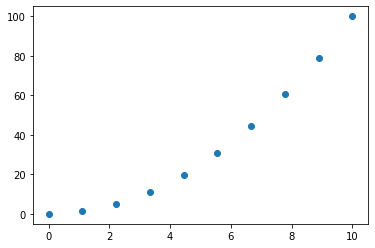

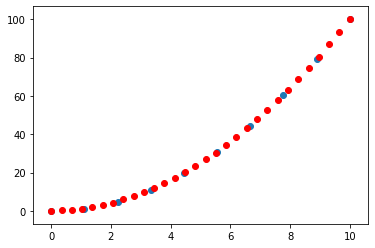

<Figure size 432x288 with 0 Axes>

In [15]:
import math
import random
import statistics
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

print('----------scipy_interpolate---------')
from scipy.interpolate import interp1d
x= np.linspace(0,10,10)
y= x**2
plt.scatter(x,y)
plt.savefig("scipy.png")
plt.show()
plt.clf()
#interpolation 
#linear = une ligne entre 2 points
#cubic = autre type
f=interp1d(x,y,kind = 'linear')
new_x = np.linspace(0,10,30)
result=f(new_x)
plt.scatter(x,y)
plt.scatter(new_x,result,c='r')
plt.savefig("scipy2.png")
plt.show()
plt.clf()

----------scipy_optimization---------


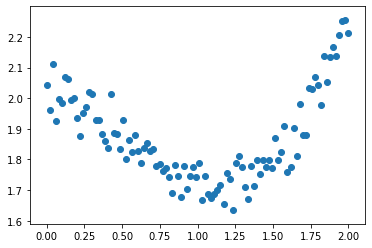

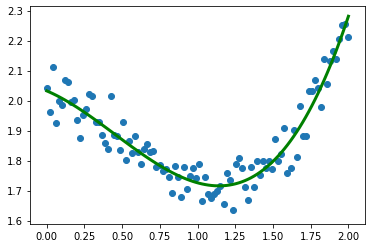

<Figure size 432x288 with 0 Axes>

In [16]:
print('----------scipy_optimization---------')
from scipy import optimize
x= np.linspace(0,2,100)
y= 1/3*x**3 - 3/5 * x**2 +2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)
plt.savefig("optimize1.png")
plt.show()
plt.clf()
def f(x,a,b,c,d):
    return a * x**3 + b * x**2 + c * x + d
params, param_cov = optimize.curve_fit(f,x,y)
plt.scatter(x,y)
plt.plot(x,f(x,params[0],params[1],params[2],params[3]), c='g', lw=3)
plt.savefig("optimize2.png")
plt.show()
plt.clf()

----------scipy_minimize---------


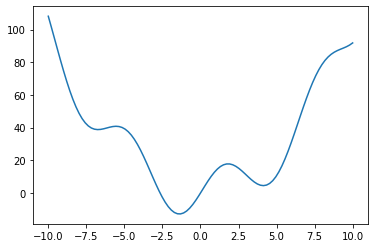

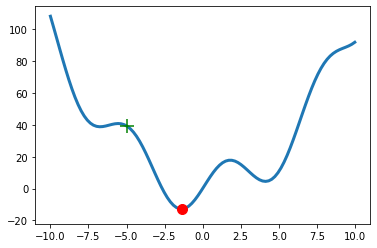

<Figure size 432x288 with 0 Axes>

In [17]:
print('----------scipy_minimize---------')
def g(x):
    return x**2 + 15*np.sin(x)
x = np.linspace(-10,10,100)
plt.plot(x,g(x))
plt.savefig("minimize1.png")
plt.show()
plt.clf()
x0=-5

#descente de gradient
result=(optimize.minimize(g,x0=x0).x)

plt.plot(x,g(x), lw=3,zorder=-1)
plt.scatter(result,g(result),s=100,c='r',zorder=1)
plt.scatter(x0,g(x0),s=200, marker='+',c='g',zorder=1)
plt.savefig("minimize2.png")
plt.show()
plt.clf()

----------scipy_signal---------


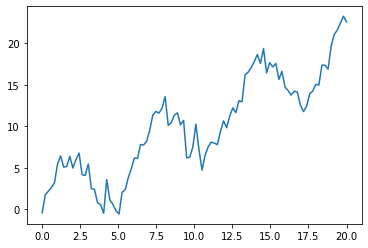

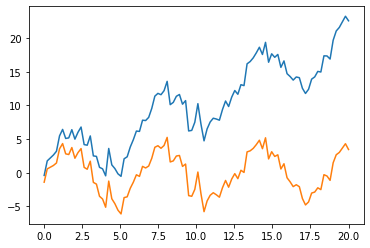

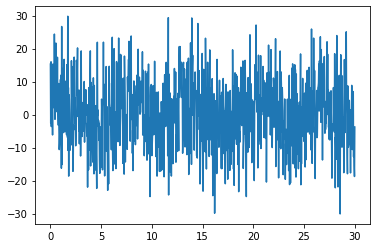

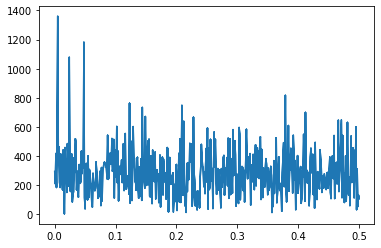

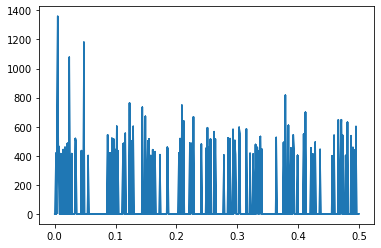

<Figure size 432x288 with 0 Axes>

In [26]:
print('----------scipy_signal---------')
#methode 1: detrend
x= np.linspace(0,20,100)
y= x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)
plt.savefig("signal1.png")
plt.show()
plt.clf()

from scipy import signal
new_y = signal.detrend(y)
plt.plot(x,y)
plt.plot(x,new_y)
plt.savefig("signal2.png")
plt.show()
plt.clf()

#methode 2 :transformation de fourier
x= np.linspace(0,30,1000)
y= 3*np.sin(x) + 2*np.sin(x*5) + np.sin(10*x) + np.random.randn(x.shape[0])*10 
plt.plot(x,y)
plt.savefig("signal3.png")
plt.show()
plt.clf()

from scipy import fftpack
fourier = fftpack.fft(y)
frequences = fftpack.fftfreq(y.size)

#valeur absolue
power = np.abs(fourier)
plt.plot(np.abs(frequences),power)
plt.savefig("signal4.png")
plt.show()
plt.clf()

#nettoyage du bruit
fourier[power<400] =0
 
plt.plot(np.abs(frequences),np.abs(fourier))
plt.savefig("signal5.png")
plt.show()
plt.clf()

#inverse fourier
''' filtered = fftpack.ifft(y)
plt.plot(filtered)
plt.savefig("signal6.png")
plt.show()
plt.clf()'''

plt.clf()


----------scipy_ndimage---------


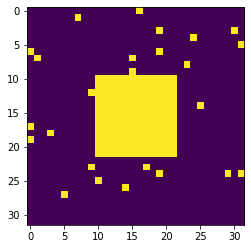

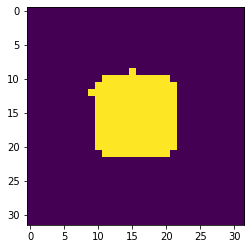

<Figure size 432x288 with 0 Axes>

In [20]:
print('----------scipy_ndimage---------')

from scipy import ndimage
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10,10:-10] =1
X[ np.random.randint(0,32,30),np.random.randint(0,32,30)] =1
plt.imshow(X)
plt.savefig("ndimage1.png")
plt.show()
plt.clf()

#nettoyage du bruit
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)
plt.savefig("ndimage2.png")
plt.show()
plt.clf()

----------scipy_ndimage_bacteria---------


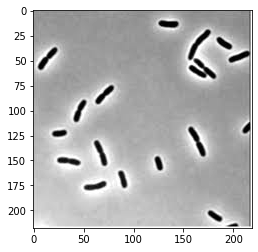

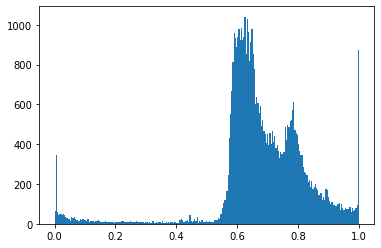

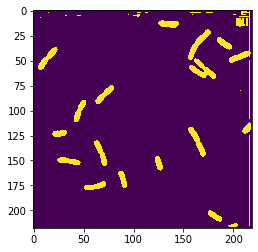

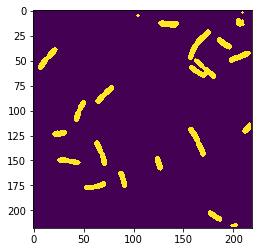

21


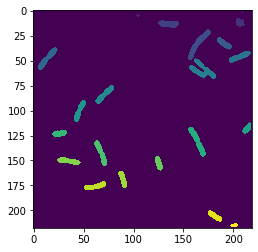

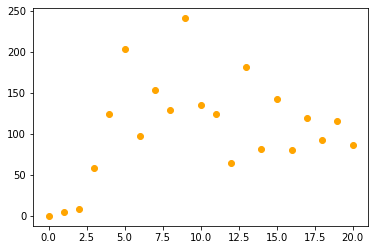

<Figure size 432x288 with 0 Axes>

In [21]:
print('----------scipy_ndimage_bacteria---------')
#lire image
image = plt.imread('images.png')
#reduire la dimension 3d>2d
image = image[:,:,0]
plt.imshow(image, cmap = 'gray')
plt.savefig("bacteria1.png")
plt.show()
plt.clf()

#extraire les bacteries de l'image
image_2 = np.copy(image)
#applatir sur 255 couleurs 
#on obtient un histogramme de la repartition des couleurs
plt.hist(image_2.ravel(),bins=255)
plt.savefig("bacteria2.png")
plt.show()
plt.clf()

#creation d'un masque bool qui ne contient que le noir des cellules
image=image <0.55
plt.imshow(image)
plt.savefig("bacteria3.png")
plt.show()
plt.clf()
#nettoyage du bruit (artefact)
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)
plt.savefig("bacteria4.png")
plt.show()
plt.clf()

#mettre de etiquettes sur chaque bacterie
label_image, n_labels = ndimage.label(open_x)
#nombre etiquettes
print(n_labels)

#une couleur par label
plt.imshow(label_image)
plt.savefig("bacteria5.png")
plt.show()
plt.clf()

#representer le nombre de pixels par label
sizes = ndimage.sum(open_x,label_image,range(n_labels))
plt.scatter(range(n_labels), sizes, c='orange')
plt.savefig("bacteria6.png")
plt.show()
plt.clf()
